### Loading Libraries and Data

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train  = pd.read_csv('Downloads/train_E6oV3lV.csv')
test = pd.read_csv('Downloads/test_tweets_anuFYb8.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


Let's check out a few non racist/sexist tweets.¶

In [5]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


Now check out a few racist/sexist tweets.¶

In [6]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


Let's check dimensions of the train and test dataset.

In [7]:
train.shape, test.shape

((31962, 3), (17197, 2))

Let's have a glimpse at label-distribution in the train dataset.

In [8]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

### Data Cleaning

For our convenience, let’s first combine train and test set. This saves the trouble of performing the same steps twice on test and train.

In [9]:
combi = train.append(test, ignore_index=True)
combi.shape

C:\Users\jppat\AppData\Local\Temp\ipykernel_36088\875916011.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = train.append(test, ignore_index=True)


(49159, 3)

Given below is a user-defined function to remove unwanted text patterns from the tweets.

 We will use this function to remove the pattern ‘@user’ from all the tweets in our data.

In [10]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

Now let’s create a new column tidy_tweet, it will contain the cleaned and processed tweets. 

In [11]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
 

In [12]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


Removing Punctuations, Numbers, and Special Characters

In [14]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head()

C:\Users\jppat\AppData\Local\Temp\ipykernel_36088\2668706232.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


Removing Short Words

In [15]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [16]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


### Tokenization

tokenization is the process of splitting a string of text into tokens.

In [17]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

In [18]:
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

Here we will use nltk's PorterStemmer() function to normalize the tweets.

In [19]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

Now let’s stitch these tokens back together.

In [20]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

In [21]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


So we have cleaned the tweets text so far, now lets visualize cleaned text

### Story Generation and Visualization from Tweets

Understanding the common words used in the tweets: WordCloud

Let’s visualize all the words our data using the wordcloud plot.

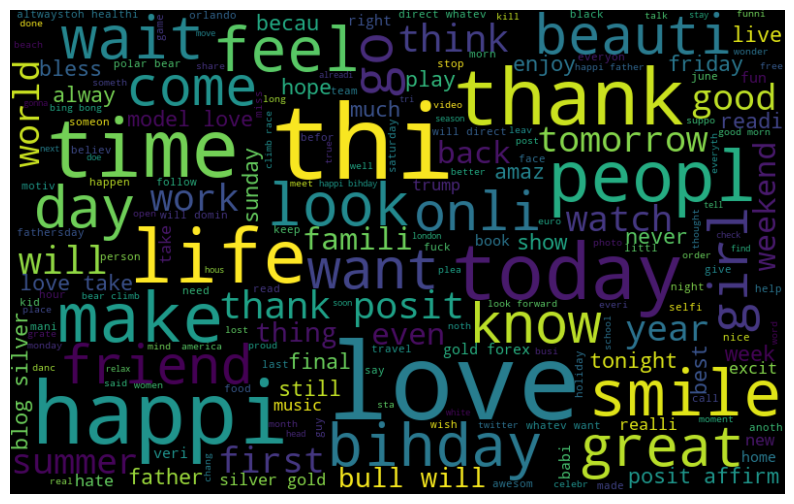

In [28]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

Words in non racist/sexist tweets

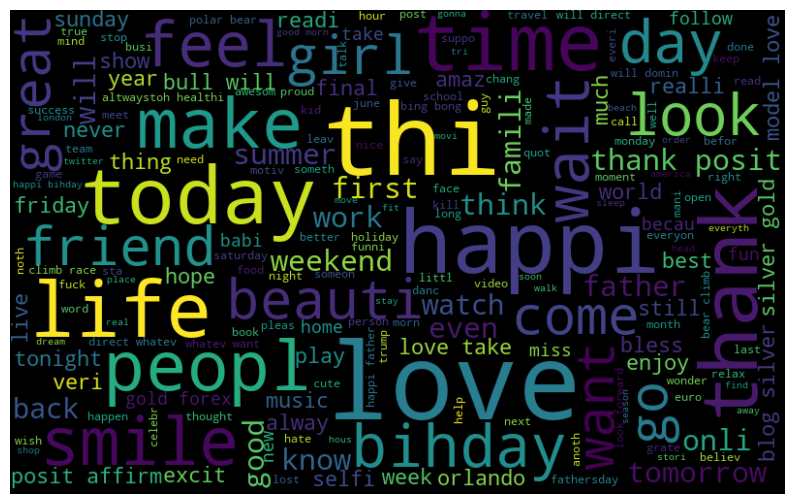

In [29]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Similarly, we will plot the word cloud for racist or sexist tweets

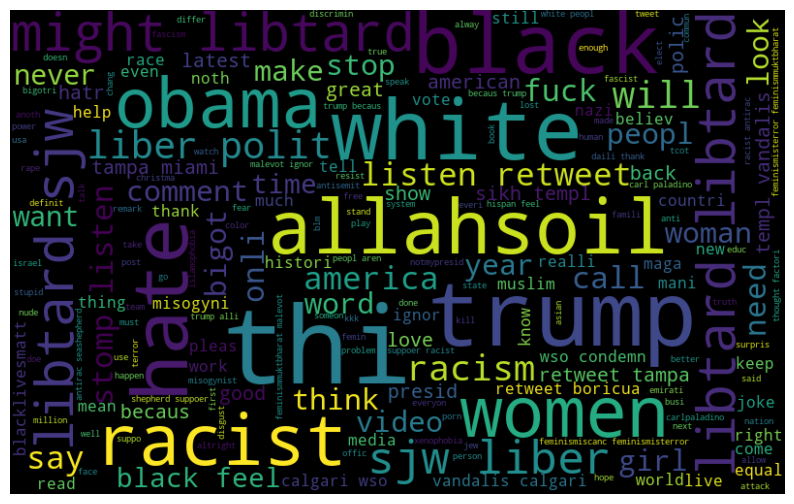

In [30]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

 Understanding the impact of Hashtags on tweets sentiment

In [31]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [32]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top n hashtags.

Non-Racist/Sexist Tweets

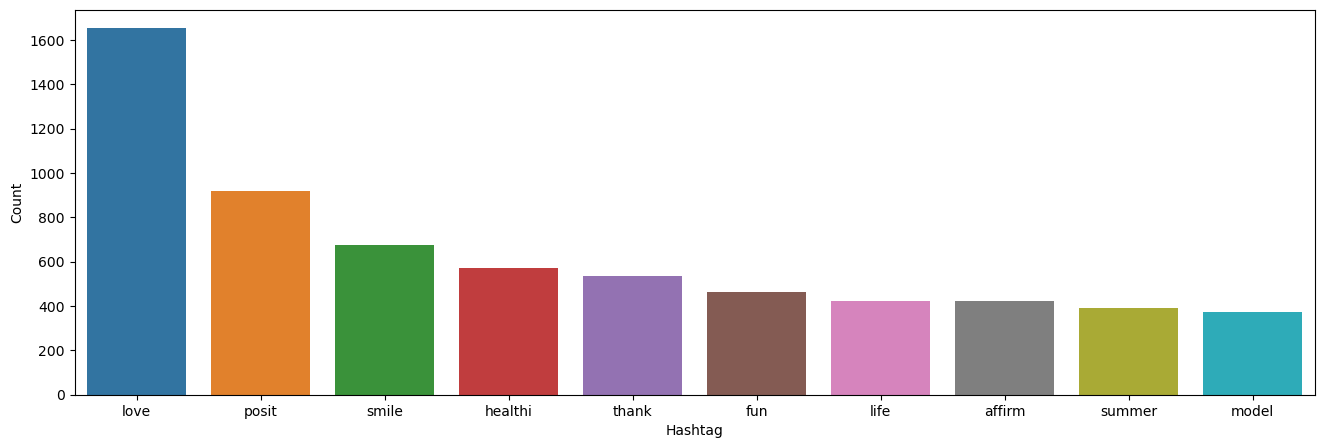

In [33]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Racist/Sexist Tweets

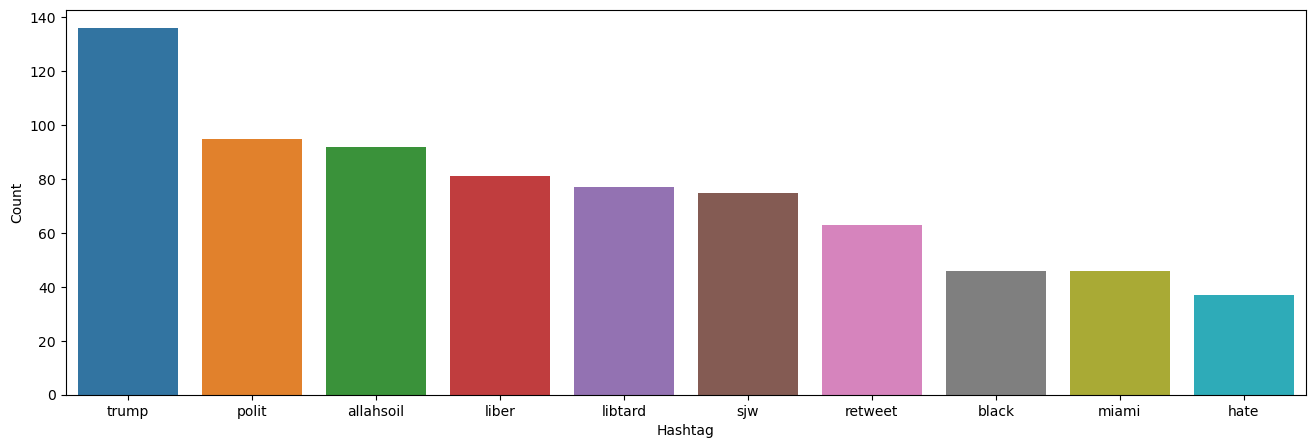

In [34]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. 

Next, we will try to extract features from the tokenized tweets.

### Extracting Features from Cleaned Tweets

So now to analyze preprocessed data it has to be converted into features using three techniques– Bag-of-Words, TF-IDF, and Word Embeddings. 

#### 1. Bag-of-Words Features

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [37]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

#### 2. TF-IDF Features

In [38]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

#### 3. Word2Vec Embeddings

In [62]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6510028, 7536020)

Let's play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.

In [63]:
model_w2v.wv.most_similar(positive="dinner")

[('melani', 0.6387686133384705),
 ('spaghetti', 0.6287722587585449),
 ('aladdin', 0.607227087020874),
 ('#biall', 0.6020666360855103),
 ('#avocado', 0.5962980389595032),
 ('lunch', 0.5910462737083435),
 ('cookout', 0.5895851254463196),
 ('dess', 0.5864593982696533),
 ('#cellar', 0.582895040512085),
 ('#tacotuesday', 0.581478476524353)]

In [64]:
model_w2v.wv.most_similar(positive="trump")

[('#delegaterevolt', 0.6701810359954834),
 ('phoni', 0.6367478370666504),
 ('melo', 0.6207751035690308),
 ('donald', 0.6197397708892822),
 ('capitalist', 0.6163924932479858),
 ('#deplor', 0.6130968332290649),
 ('fraud', 0.6123806834220886),
 ('hillari', 0.6122598052024841),
 ('tomlin', 0.6110076308250427),
 ('businessman', 0.6104369759559631)]

In [67]:
model_w2v.wv.get_index('food')

260

In [68]:
model_w2v.wv.get_vector('food')

array([ 0.32377395, -0.4005264 ,  0.5264548 ,  0.24937664, -0.2670757 ,
       -0.3570995 ,  0.6193633 , -0.55375725, -0.00792001,  0.04330403,
       -0.13851589, -0.42216685,  0.39197752, -0.623979  ,  0.26089916,
       -0.6006615 ,  0.48893133, -1.289294  ,  0.3216262 , -0.2463773 ,
       -0.13532381,  0.71867675,  0.09085946,  0.92447937, -1.0736665 ,
       -0.15799111, -0.4668453 , -0.242342  ,  0.33744642, -0.49197003,
       -0.56988674, -1.1499836 , -0.03198361,  0.37345564, -0.5481726 ,
       -1.09638   , -0.46772933,  1.1283817 ,  0.48291567,  0.78857595,
       -0.45856354,  0.9186582 ,  0.25118256, -0.35580206,  0.30585992,
        0.12451546,  0.39431474, -1.0544208 ,  0.42702788,  0.6693608 ,
        0.15403676, -0.09175619,  0.5777526 ,  0.1316279 , -0.22093186,
        0.36549506, -0.6967067 , -0.03945361,  0.9476151 ,  0.6130273 ,
       -0.5630308 , -0.11412683, -0.10837156,  0.7585366 , -0.01962857,
       -0.33751425,  0.66215444,  0.78728116,  0.2504283 , -0.44

In [69]:
len(model_w2v.wv.get_vector('food'))

100

### Preparing Vectors for Tweets

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [91]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv.get_vector(word).reshape((1, size))
            count += 1
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [84]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

In [85]:
len(tokenized_tweet)

49159

In [87]:
tokenized_tweet[0]

['when',
 'father',
 'dysfunct',
 'selfish',
 'drag',
 'kid',
 'into',
 'dysfunct',
 '#run']

In [90]:
model_w2v.wv.get_vector('when')

array([ 0.10999533, -0.35840914,  0.36361176,  0.35415903, -0.301864  ,
       -0.08262223, -0.3501408 ,  0.16328776, -0.59474844,  0.9530859 ,
       -0.5283665 ,  0.3756561 ,  0.0234304 , -0.1979467 ,  0.54197353,
       -0.05202854,  0.1357826 , -0.43132725, -0.18876824,  0.3541238 ,
       -0.08479001, -0.2112615 , -0.3063249 ,  0.32454836, -0.41437688,
       -0.20959954, -0.6011676 , -0.19972442,  0.26011723, -0.42965475,
        0.09368747, -0.46695742,  0.12032131,  0.43403727, -0.18880683,
        0.23790777, -0.19885643,  0.00833863,  0.12067968,  0.1630145 ,
       -0.36623853,  0.05635447, -0.26188457,  0.00293476,  0.00621807,
       -0.03385276,  0.60738367, -0.49164528, -0.13212484, -0.20736797,
        0.31552434, -0.14394079,  0.29821217,  0.19853683,  0.40656447,
        0.04259228, -0.47448254, -0.05572436,  0.44532946,  0.04677034,
       -0.46489266, -0.00732594,  0.5779219 ,  0.18956104,  0.00792813,
        0.36530176,  0.30397913,  0.7616396 ,  0.43982962, -0.72

In [93]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 100))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 100)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape    

(49159, 100)

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [94]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv.get_vector(word).reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [95]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 100))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 100)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 100)

## Model Building

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors. We will use the following algorithm to build models:

## 1.Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


Bag-of-Words Features

In [97]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [98]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.5303408146300915

Now let's make predictions for the test dataset and create a submission file.

In [99]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False)

TF-IDF Features

In [100]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [103]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [104]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.625

## 2.Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier


Bag-of-Words Features

In [106]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5529225908372828

Let's make predictions for the test dataset and create another submission file.

In [107]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_rf_bow.csv', index=False)

TF-IDF Features

In [108]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.562152133580705

Word2Vec Features

In [109]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.5200845665961946

## 3. XGBoost

In [111]:
!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 5.5 MB/s eta 0:00:00


In [112]:
from xgboost import XGBClassifier

Bag-of-Words Features

In [113]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5247706422018349

In [114]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

TF-IDF Features

In [128]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5394265232974911

In [120]:
import datetime
t1 = datetime.datetime.now()
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

prediction = xgb.predict(xvalid_tfidf)
print(f1_score(yvalid, prediction))
t2 = datetime.datetime.now()
print(t2-t1)

0.5394265232974911
0:00:07.594209


Word2Vec Features

In [132]:
t1 = datetime.datetime.now()
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)
t2 = datetime.datetime.now()
print(t2-t1)


0:01:55.142692


In [135]:
prediction = xgb.predict(xvalid_w2v)
print(f1_score(yvalid, prediction))

0.6565836298932385
